<a href="https://colab.research.google.com/github/tomeliud/test_project/blob/master/Moringa_Data_Science_Core_W4_Independent_Project_2020_17_Tom_Njoroge_Python_Note_book.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Defining our research question 

In this research we will look more into the preference of Blue-car versus utilib cars. We will tests the hypothesis that Blue cars are highly preffered over Utilib cars 

# Importing our libraries 

In [1]:
import pandas as pd 
import numpy as np 
from scipy.stats import norm
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib
from matplotlib import pyplot as plt

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


# Loading our dataset 

In [2]:
auto_lib = pd.read_csv('autolib_daily_events_postal_code.csv')
auto_lib.head(5)

,Postal code,date,n_daily_data_points,dayOfWeek,day_type,BlueCars_taken_sum,BlueCars_returned_sum,Utilib_taken_sum,Utilib_returned_sum,Utilib_14_taken_sum,Utilib_14_returned_sum,Slots_freed_sum,Slots_taken_sum
0,75001,1/1/2018,1440,0,weekday,110,103,3,2,10,9,22,20
1,75001,1/2/2018,1438,1,weekday,98,94,1,1,8,8,23,22
2,75001,1/3/2018,1439,2,weekday,138,139,0,0,2,2,27,27
3,75001,1/4/2018,1320,3,weekday,104,104,2,2,9,8,25,21
4,75001,1/5/2018,1440,4,weekday,114,117,3,3,6,6,18,20


# Data cleaning 

To clean our data we will perofrm few procedures to view the nature of our dataset

In [3]:
auto_lib.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16085 entries, 0 to 16084
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Postal code             16085 non-null  int64 
 1   date                    16085 non-null  object
 2   n_daily_data_points     16085 non-null  int64 
 3   dayOfWeek               16085 non-null  int64 
 4   day_type                16085 non-null  object
 5   BlueCars_taken_sum      16085 non-null  int64 
 6   BlueCars_returned_sum   16085 non-null  int64 
 7   Utilib_taken_sum        16085 non-null  int64 
 8   Utilib_returned_sum     16085 non-null  int64 
 9   Utilib_14_taken_sum     16085 non-null  int64 
 10  Utilib_14_returned_sum  16085 non-null  int64 
 11  Slots_freed_sum         16085 non-null  int64 
 12  Slots_taken_sum         16085 non-null  int64 
dtypes: int64(11), object(2)
memory usage: 1.6+ MB


In [4]:
auto_lib.describe()

,Postal code,n_daily_data_points,dayOfWeek,BlueCars_taken_sum,BlueCars_returned_sum,Utilib_taken_sum,Utilib_returned_sum,Utilib_14_taken_sum,Utilib_14_returned_sum,Slots_freed_sum,Slots_taken_sum
count,16085.000000,16085.000000,16085.000000,16085.000000,16085.000000,16085.000000,16085.000000,16085.000000,16085.000000,16085.000000,16085.000000
mean,88791.293876,1431.330619,2.969599,125.926951,125.912714,3.698290,3.699099,8.600560,8.599192,22.629033,22.629282
std,7647.342000,33.212050,2.008378,185.426579,185.501535,5.815058,5.824634,12.870098,12.868993,52.120263,52.146030
min,75001.000000,1174.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,91330.000000,1439.000000,1.000000,20.000000,20.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000
50%,92340.000000,1440.000000,3.000000,46.000000,46.000000,1.000000,1.000000,3.000000,3.000000,0.000000,0.000000
75%,93400.000000,1440.000000,5.000000,135.000000,135.000000,4.000000,4.000000,10.000000,10.000000,5.000000,5.000000
max,95880.000000,1440.000000,6.000000,1352.000000,1332.000000,54.000000,58.000000,100.000000,101.000000,360.000000,359.000000


In [5]:
auto_lib.isnull().values.any()

False

In [6]:
auto_lib.duplicated().values.any()

False

In [7]:
auto_lib.columns

Index(['Postal code', 'date', 'n_daily_data_points', 'dayOfWeek', 'day_type',
       'BlueCars_taken_sum', 'BlueCars_returned_sum', 'Utilib_taken_sum',
       'Utilib_returned_sum', 'Utilib_14_taken_sum', 'Utilib_14_returned_sum',
       'Slots_freed_sum', 'Slots_taken_sum'],
      dtype='object')

Checking for outliers in our dataset 

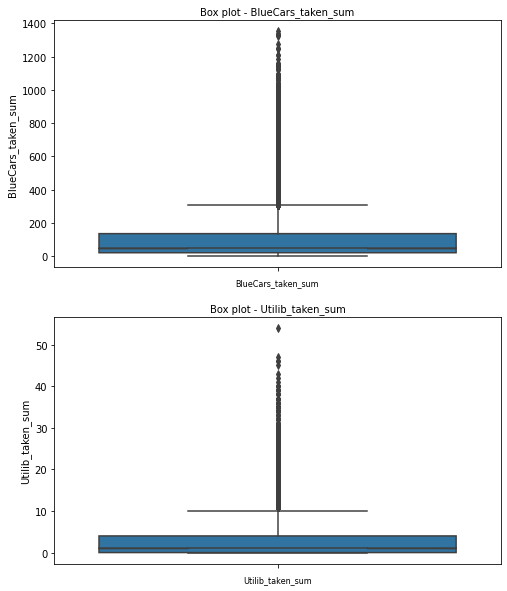

In [8]:
col_names = ['BlueCars_taken_sum', 'Utilib_taken_sum']

fig, ax = plt.subplots(len(col_names), figsize=(8,10))

for i, col_val in enumerate(col_names):
  sns.boxplot(y=auto_lib[col_val], notch=True, ax=ax[i])
  ax[i].set_title("Box plot - {}".format(col_val), fontsize=10)
  ax[i].set_xlabel(col_val, fontsize=8)

plt.show()

# Univariate Analysis 

To perform Univariate analysis we will take the columns we will be using i.e. Blue cars and Utilib Cars 

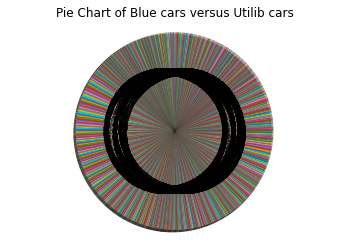

In [9]:
cars = auto_lib.groupby(['BlueCars_taken_sum'])['Utilib_taken_sum'].sum()
plt.pie(cars, autopct = '%1.1f%%', shadow = True, startangle = 140)
plt.axis('equal')
plt.title('Pie Chart of Blue cars versus Utilib cars')
plt.show()


# Bivariate analysis 

In [10]:
df_a = auto_lib.iloc[:, 5:9]
df_a.tail(5)

,BlueCars_taken_sum,BlueCars_returned_sum,Utilib_taken_sum,Utilib_returned_sum
16080,15,10,0,0
16081,19,19,0,0
16082,33,35,1,1
16083,11,14,3,5
16084,2,2,2,1


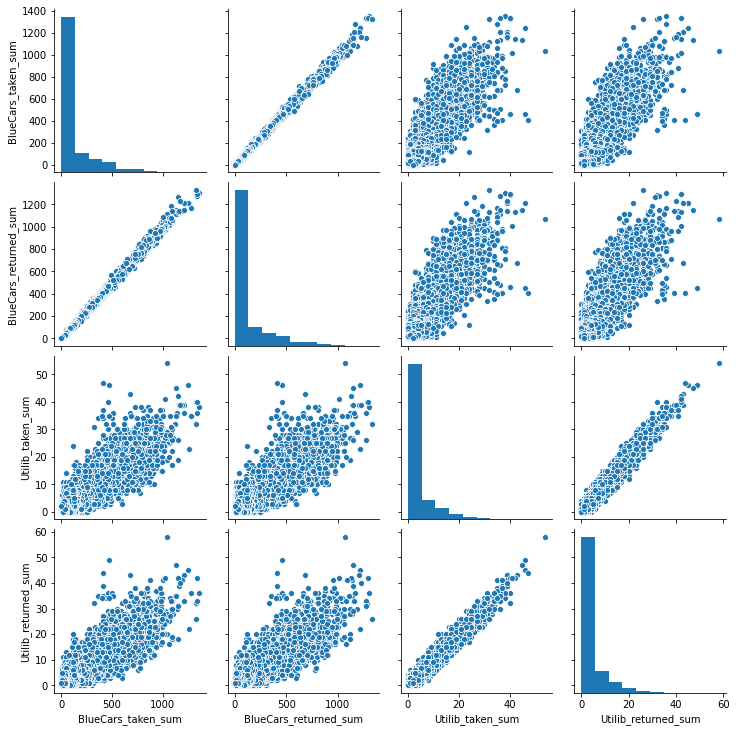

In [11]:
sns.pairplot(df_a)
plt.show()

# Hypothesis Statement Formulation 

In this section we will define and conduct a hypothesis testing to our dataset. We will seek to search for the Null hypothesis i.e. the estimated population size that belives Blue cars (electirc cars) are highly preffered over Utilib cars, and the Alternative hypothesis which claims that the opposite of the Null hypothesis is true for our case Utilib cars are higly preffered unlike Blue cars. 

Ho = Blue cars are highly preffered unlike utilib cars 

Ha = Thier is no differences over the prefference of cars 

Null hypothesis 

In [0]:
#our null hypothesis could be denoted as 
Ho: p = 0.5 

Alternative Hypothesis 

While as our alternative hypothesis maybe denoted as Ha: p =/ 0.5 i.e. is not 0.5 

# Hypothesis testing and computation 

Subsequently, we will then compute and test for our hypothesis 

Our P-test hypothesis proves that oour Null hypothesis is true since users prefer Blue cars over Utilib Cars  

In [0]:
#Looking at the total number of Blue cars and Utillib cars which is as 2025535 and 138340 repectively 
#it is evident that blue cars were preferred over utilib cars 
x = 2025535 + 138340
print(x)
y = x / 2025535
print("The Preference ratio then is:", y)

We will first find the sum, standard deviation and average of our two columns 

Average and standard deviation of Blue cars 

In [0]:
blue_average = auto_lib['BlueCars_taken_sum'].mean()
blue_average

In [0]:
blue_standard_deviation = auto_lib['BlueCars_taken_sum'].std()
blue_standard_deviation

In [0]:
sum_blue_car = auto_lib['BlueCars_taken_sum'].sum()
sum_blue_car

Average and standard deviation of Utilib Cars 

In [0]:
utilib_average = auto_lib['Utilib_14_taken_sum'].mean()
utilib_average

In [0]:
utilib_standard_deviation = auto_lib['Utilib_14_taken_sum'].std()
utilib_standard_deviation

In [0]:
utilib_sum = auto_lib['Utilib_14_taken_sum'].sum()
utilib_sum 

Therefore the z-score can be computed as follows 

In [0]:
#selecting the bluecars and Utilib cars 
bcars= auto_lib['BlueCars_taken_sum']
ucars= auto_lib['Utilib_taken_sum']

# Test Statistic 

We will use the z-score since our sample is greater than 30

> 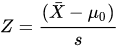


Calculating the z-score and p-values 

In [0]:
from statsmodels.stats import weightstats as stests #For z test calculation

def zscore(x, y):
    ztest ,pvalue = stests.ztest(x, x2=y, value=0,alternative='two-sided')
    print(f'The p-value is: {pvalue}')

zscore(bcars,ucars)

The p-value is grater than level of significance so I accpet the null hypothesis. Therefore, our null hypothesis was true Blue cars were highly preffered over Utilib cars. 

# Report 

Hypothesis statement formulation


In our research we seek to find out which type of cars were most preferred by users i.e. Blue cars or Utilib cars. This research will play a significant role in advising relevant stakeholders on which strategies to adopt. For instance, if customers prefer Blue Cars over Utilib cars the car hire company might consider lowering the costs for hiring a Utilib car to increase their demand. 


Hypothesis statement 


Null hypothesis statement:
Ho = Blue cars are highly preferred over Utilib cars  



Alternative hypothesis:
Ha = No difference over the preference of cars 
Hypothesis Testing Computation 



Sampling


In our report we will Systematic sampling since we have a record of the total number of Blue cars versus Utilib cars hired. 
 Furthermore, since our data contains more than 30 samples will carry out a z-score test to establish our hypothesis.  
 
Since the p-value and z-score returned an amount higher than my confidence level I therefore accept the null hypothesis proving that Blue cars were highly preferred over Utilib cars. 


Conclusion 


Based on the results of our report we can conclude that 
In London Blue cars i.e. Electric cars were highly preferred for higher when compared to Utilib cars. 

To increase the car's higher rate of Utilib cars the firm needs to come up with strategies to improve such sales.
 
Subsequently, it is important to note that electric cars are currently doing well in the market thus wise to invest in the venture ensuring that they are readily available.  
